# Multi-class Classification:Data Science in Hospitality Management
## Problem Statement:

You are provided with a comprehensive dataset from a hotel booking system. The dataset includes various features such as the number of adults and children, duration of stay (split between weekend and weeknights), meal plan preference, requirement for parking space, lead time, arrival dates (year, month, date), market segment, guest history (repeated guest, number of previous cancellations, and number of previous bookings not canceled), average price per room, number of special requests, and booking status. The objective is to develop a predictive model that can accurately forecast the type of room a guest is likely to reserve (room_type_reserved). Successfully predicting the room_type_reserved will empower hotels to optimize room inventory management, tailor marketing strategies, enhance guest experiences through personalized services, improve revenue management through dynamic pricing, and boost operational efficiency by anticipating demand for various room types.

## Aim:
* To perform multi-class classification on room types that customer will likely to reserve

## Dataset Attributes
The dataset provided from a hotel booking system and contains various features that describe the booking details and customer preferences. Here is a brief overview of the dataset columns: 
* no_of_adults: The number of adults included in the booking.
* no_of_children: The number of children included in the booking.
* no_of_weekend_nights: The number of weekend nights booked.
* no_of_week_nights: The number of weeknights booked.
* type_of_meal_plan: The type of meal plan selected by the guest.
* required_car_parking_space: Indicates whether the guest required a car parking space.
* room_type_reserved: The type of room reserved by the guest.
* lead_time: The number of days between the booking date and the arrival date.
* arrival_year: The year of arrival.
* arrival_month: The month of arrival.
* arrival_date: The date of arrival.
* market_segment_type: The market segment from which the booking originated.
* repeated_guest: Indicates whether the guest has previously stayed at the hotel.
* no_of_previous_cancellations: The number of previous bookings that were canceled by the guest.
* no_of_previous_bookings_not_canceled: The number of previous bookings not canceled by the guest.
* avg_price_per_room: The average price per room for the booking.
* no_of_special_requests: The number of special requests made by the guest.
* booking_status: Indicates whether the booking was canceled or not.

# Load dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

In [2]:
room_df= pd.read_csv("C:\\Users\\kumarip\\Documents\\Priya\\midterm\\Problem3\\dataset\\train.csv")
room_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Offline,0,0,0,61.0,0,Canceled
1,2,0,0,1,Meal Plan 1,0,Room_Type 1,15,2018,12,27,Offline,0,0,0,65.0,0,Not_Canceled
2,1,0,2,2,Meal Plan 1,0,Room_Type 5,44,2018,5,27,Corporate,0,0,0,135.4,0,Canceled
3,2,0,1,3,Meal Plan 1,0,Room_Type 1,250,2018,9,26,Online,0,0,0,95.0,0,Canceled
4,3,0,2,3,Meal Plan 1,0,Room_Type 4,48,2018,7,2,Online,0,0,0,157.5,0,Canceled


# Questions
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

## Question 1 : Data Analysis (10 pt)
Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

Display the statistical values for each of the attributes, of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

Analyze and discuss the relationships between the data attributes, and between the data attributes and label.

Analyze the relationship between all the features. Use appropriate visualization techniques.

In [3]:
print(room_df.shape)

(32641, 18)


> There are 32641 rows and 18 columns

In [4]:
room_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32641 entries, 0 to 32640
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          32641 non-null  int64  
 1   no_of_children                        32641 non-null  int64  
 2   no_of_weekend_nights                  32641 non-null  int64  
 3   no_of_week_nights                     32641 non-null  int64  
 4   type_of_meal_plan                     32641 non-null  object 
 5   required_car_parking_space            32641 non-null  int64  
 6   room_type_reserved                    32641 non-null  object 
 7   lead_time                             32641 non-null  int64  
 8   arrival_year                          32641 non-null  int64  
 9   arrival_month                         32641 non-null  int64  
 10  arrival_date                          32641 non-null  int64  
 11  market_segment_

In [5]:
#Get the categorial and continous features according to the above table
continuous_feature=[]
categorical_features=[]

for col in room_df.columns:
    if room_df[col].dtype=="object" or room_df[col].dtype=="category" :
        categorical_features.append(col)
    else:
        continuous_feature.append(col)

print('categorical_features :' ,categorical_features)
print('\ncontinuous_feature:' ,continuous_feature)

categorical_features : ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

continuous_feature: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [6]:
room_df['required_car_parking_space'].value_counts()

required_car_parking_space
0    31627
1     1014
Name: count, dtype: int64

In [7]:
room_df['repeated_guest'].value_counts()    

repeated_guest
0    31818
1      823
Name: count, dtype: int64

> It's evident that 'required_car_parking_space' and 'repeated_guest' should be regarded as categorical variables. Furthermore, since dates lack a natural numerical order, 'arrival_date', 'arrival_year', and 'arrival_month' are more aptly treated as categorical rather than continuous variables. Additionally, 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', and 'no_of_special_requests' will also be treated as categorical variables. The required conversion will be done in qs2

In [8]:
#  statistical values for numerical variables
room_df[continuous_feature].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,32641.0,1.846941,0.517504,0.0,2.0,2.00,2.00,4.0
no_of_children,32641.0,0.105205,0.400701,0.0,0.0,0.00,0.00,10.0
no_of_weekend_nights,32641.0,0.810913,0.870699,0.0,0.0,1.00,2.00,7.0
no_of_week_nights,32641.0,2.204528,1.408902,0.0,1.0,2.00,3.00,17.0
required_car_parking_space,32641.0,0.031065,0.173497,0.0,0.0,0.00,0.00,1.0
lead_time,32641.0,85.212830,85.837873,0.0,17.0,57.00,126.00,443.0
arrival_year,32641.0,2017.819858,0.384311,2017.0,2018.0,2018.00,2018.00,2018.0
arrival_month,32641.0,7.429245,3.067804,1.0,5.0,8.00,10.00,12.0
arrival_date,32641.0,15.623909,8.740196,1.0,8.0,16.00,23.00,31.0
repeated_guest,32641.0,0.025214,0.156776,0.0,0.0,0.00,0.00,1.0


> We observe that:
>> Bookings typically involve 1-2 adults, with few children.</br>
>>Guests stay for 1-2 weekend nights and 2-3 weeknights.</br>
>>Majority of bookings don't require car parking.</br>
>>Lead time varies widely, from immediate to over 400 days.</br>
>>Most bookings were made in 2017, with July being a popular arrival month.</br>
>>Average price per room is approximately $103.</br>

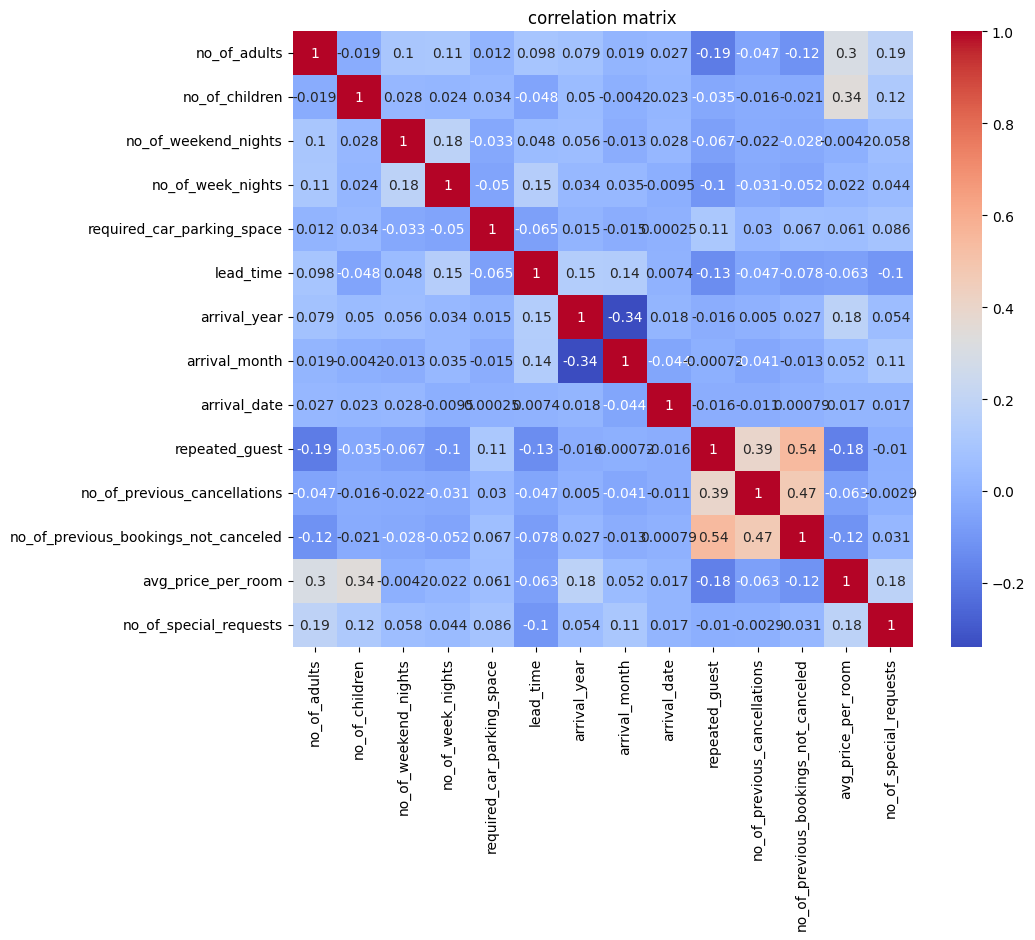

In [9]:
## correlation matrix for numerical features
corr_matrix= room_df[continuous_feature].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

>We find a positive correlation between the average price per room and the number of adults as well as the number of children. Similarly, the number of previous bookings not canceled is associated with the number of previous cancellations.

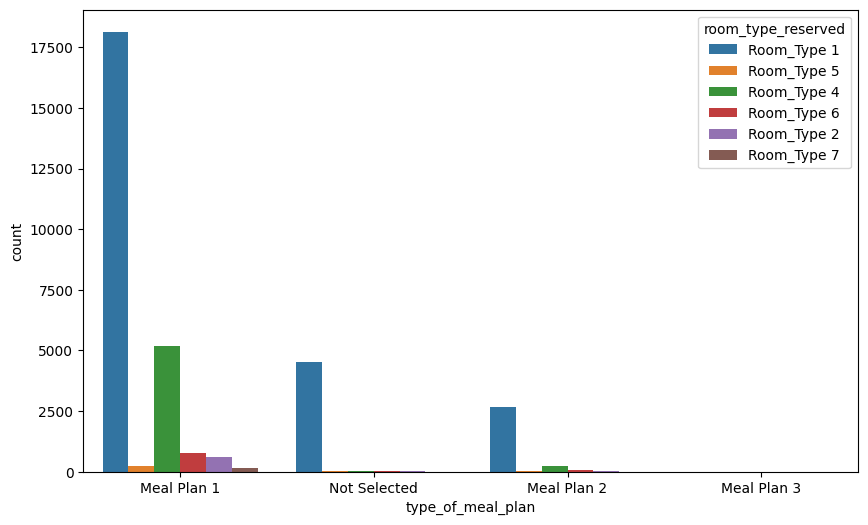

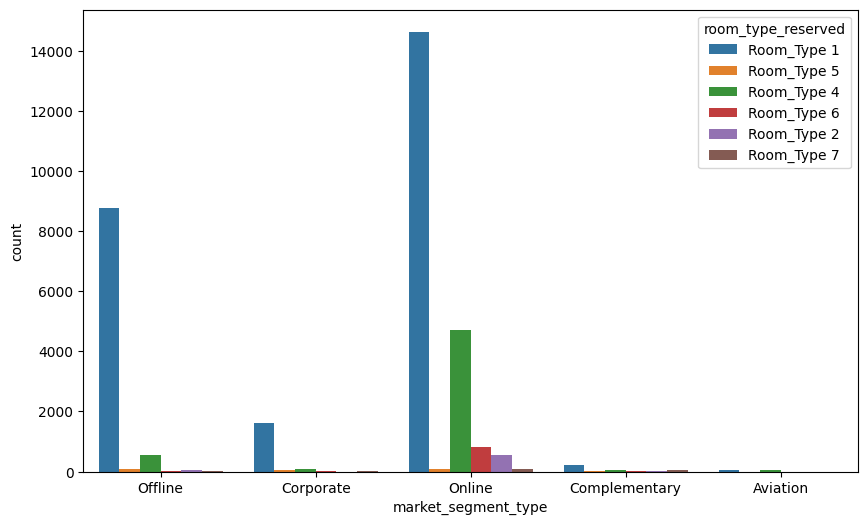

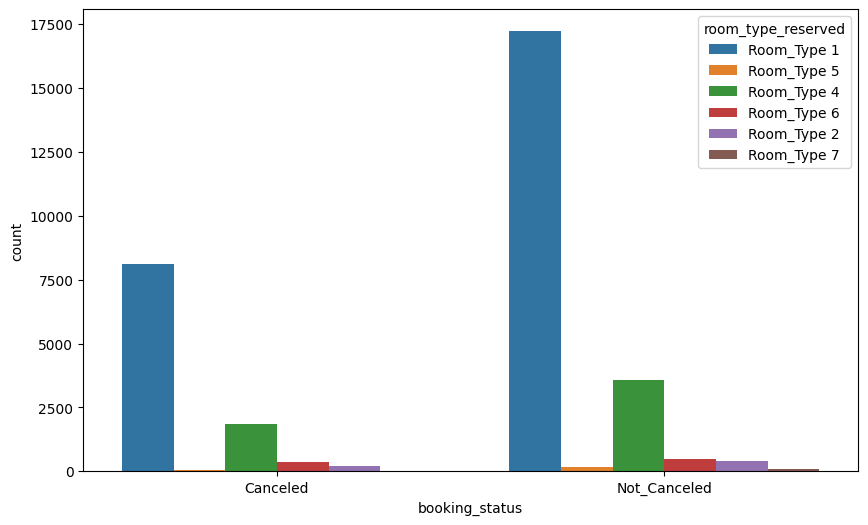

In [10]:
# countplot
for col in categorical_features:
    if col!='room_type_reserved':
        plt.figure(figsize=(10,6))
        sns.countplot(data=room_df, x=col, hue='room_type_reserved')
        plt.show()

>Most guests have selected Meal Plan 1, followed by Meal Plan 2. Very few guests have selected Meal Plan 3.For the marketing team, it could be worth investigating why Meal Plan 3 has such low popularity .Room_Type 1 is the most reserved room type, followed by Room_Type 4.The majority of bookings come from the Online market segment, followed by Offline.

In [11]:
room_df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    25317
Room_Type 4     5451
Room_Type 6      869
Room_Type 2      623
Room_Type 5      239
Room_Type 7      142
Name: count, dtype: int64

>The distribution of room types reserved reveals varying preferences among guests. Room_Type 1 is the most popular, followed by Room_Type 4. Room_Type 6, 2, 5, and 7 have progressively fewer reservations, with Room_Type 7 being the least reserved, indicating potential luxury or exclusive status.

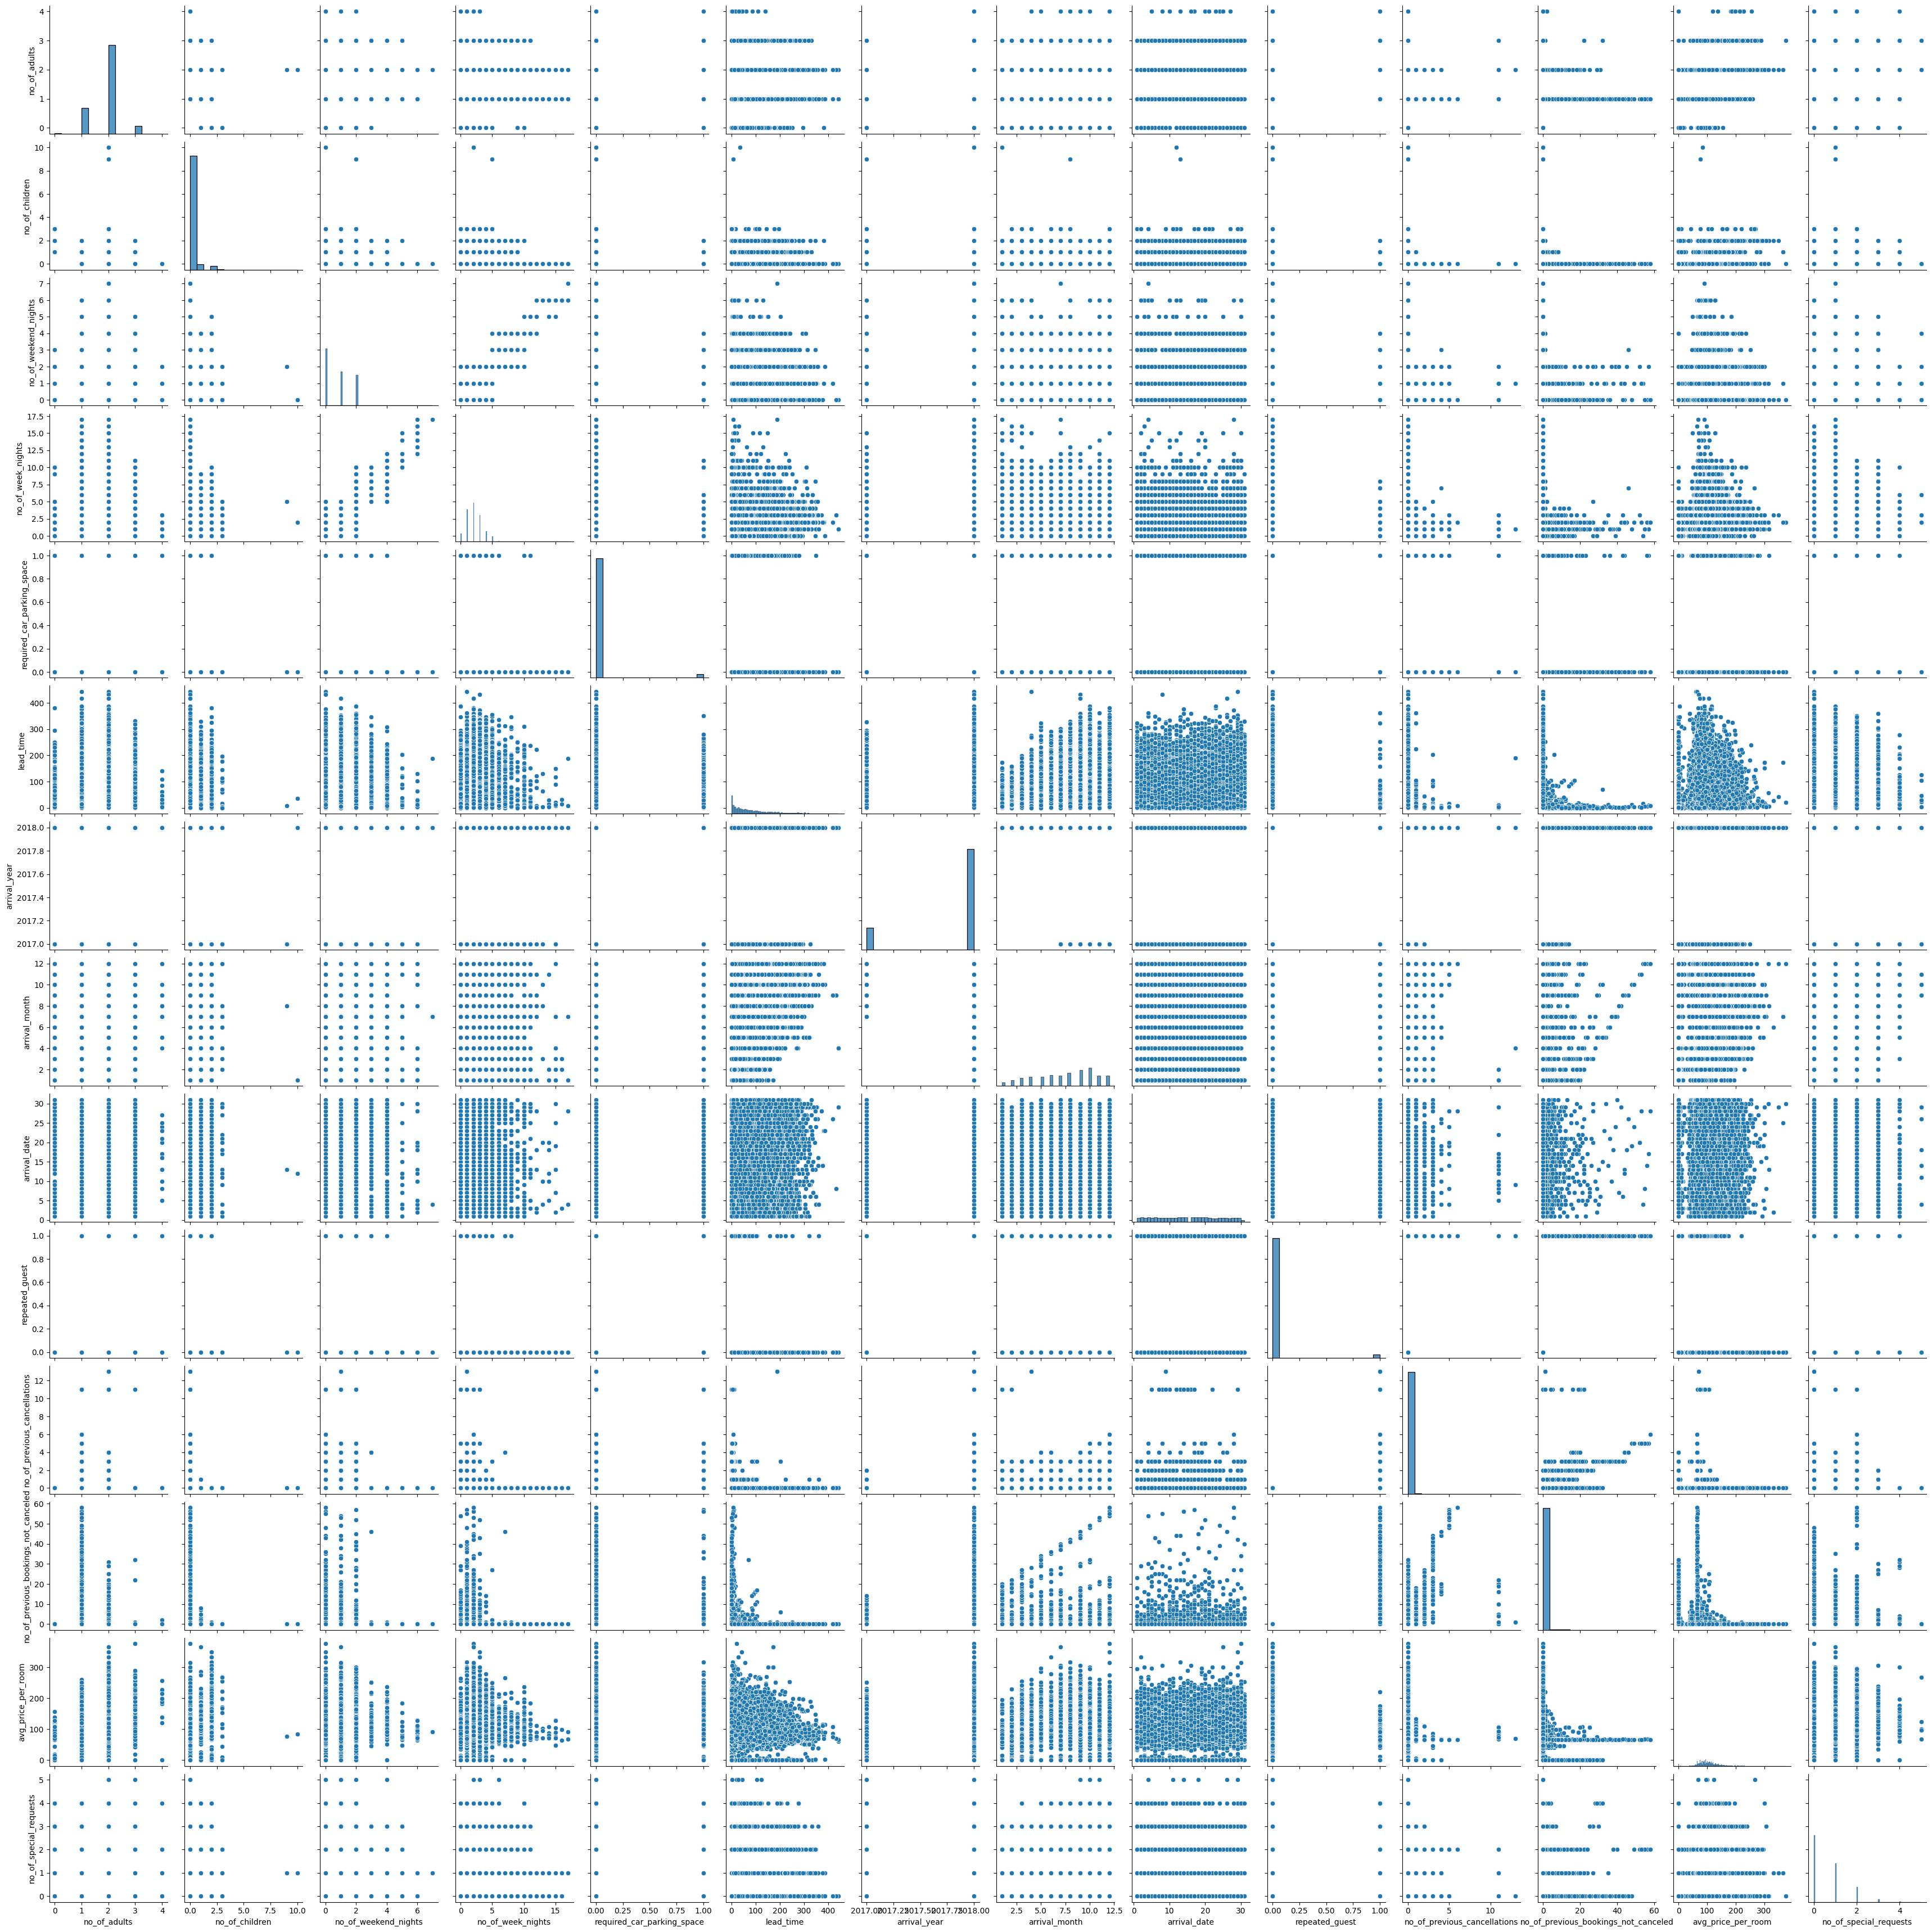

In [12]:
#pairplot

sns.pairplot(room_df)
plt.show()

>The plot illustrates the relationships between various features in the dataset. For instance, it indicates a linear relationship between the price and the number of adults, suggesting that as the number of adults increases, the price tends to increase linearly.

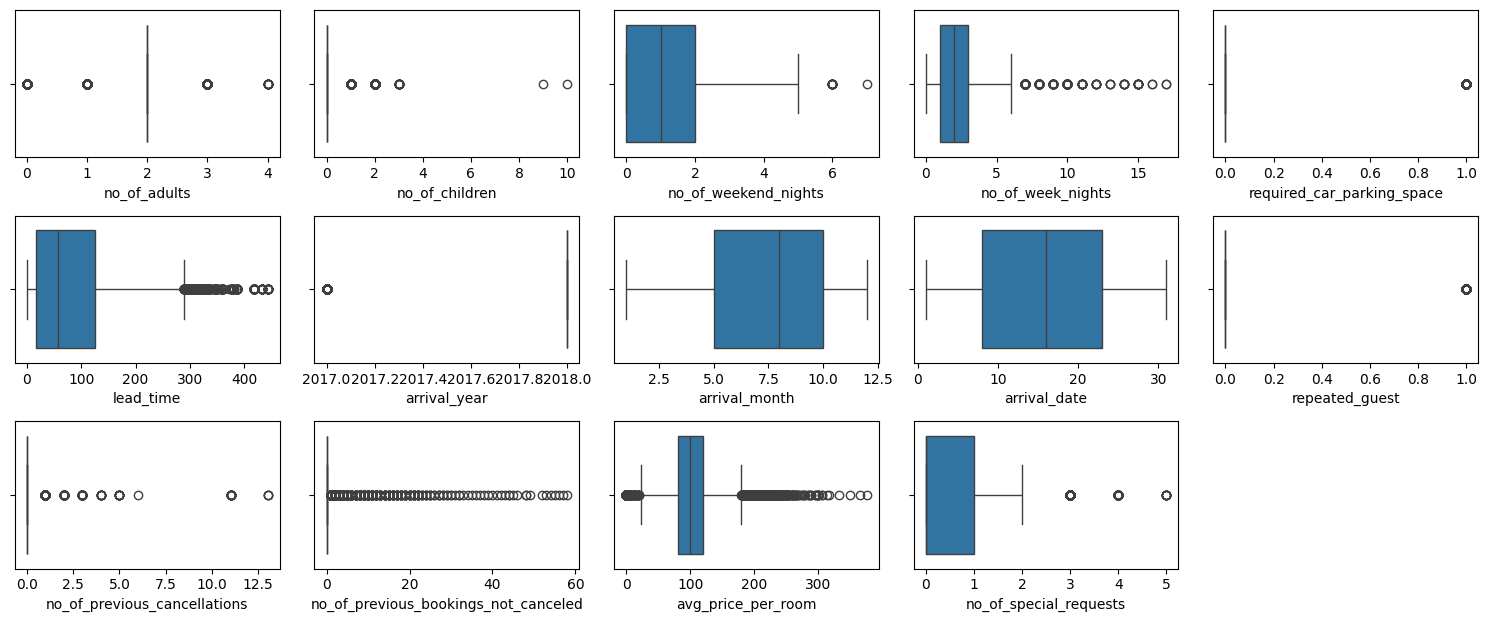

In [13]:
# Creating  box plots to see the outliers
plt.figure(figsize=(15,10))
for i, col in enumerate(continuous_feature):
    plt.subplot(5, 5, i+1)
    sns.boxplot(x=room_df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

>We note the existence of outliers in almost all features, with arrival date and month appearing to be exceptions. Given their apparent importance, removing these outliers could significantly impact the modeling outcomes. However, if required, we could explore utilizing log transformation as a potential approach to mitigate any issues arising from the presence of outliers.

## Question 2 : Data Pre-processing & Feature Engineering (20 pt)
Discuss the steps you would take to clean and prepare the data for modeling. Justify why each step is necessary. 

Analyze the relationship between all the features. Use appropriate visualization techniques.

Perform Feature Engineering on the dataset.

**Hint**: Analyze the statistical values for every attribute and visual representations of the distributions for each attribute, such as a histogram.

#### Converting to appropriate data type

In [14]:
#The below code converts columns with fewer than 57 unique values into categorical data types
for col in room_df.columns:
    uniqueness = len(room_df[col].unique())
    if(uniqueness < 57):
        room_df[col] = room_df[col].astype('category')
room_df.info() #check the results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32641 entries, 0 to 32640
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          32641 non-null  category
 1   no_of_children                        32641 non-null  category
 2   no_of_weekend_nights                  32641 non-null  category
 3   no_of_week_nights                     32641 non-null  category
 4   type_of_meal_plan                     32641 non-null  category
 5   required_car_parking_space            32641 non-null  category
 6   room_type_reserved                    32641 non-null  category
 7   lead_time                             32641 non-null  int64   
 8   arrival_year                          32641 non-null  category
 9   arrival_month                         32641 non-null  category
 10  arrival_date                          32641 non-null  category
 11  ma

> As discussed previously, the data has been converted into appropriate data types.It is important for correct interpretation for analysis and modeling purposes.

#### Null Value Treatment 

In [15]:
#Check for null values
room_df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

>There are no null values found

#### Histograms

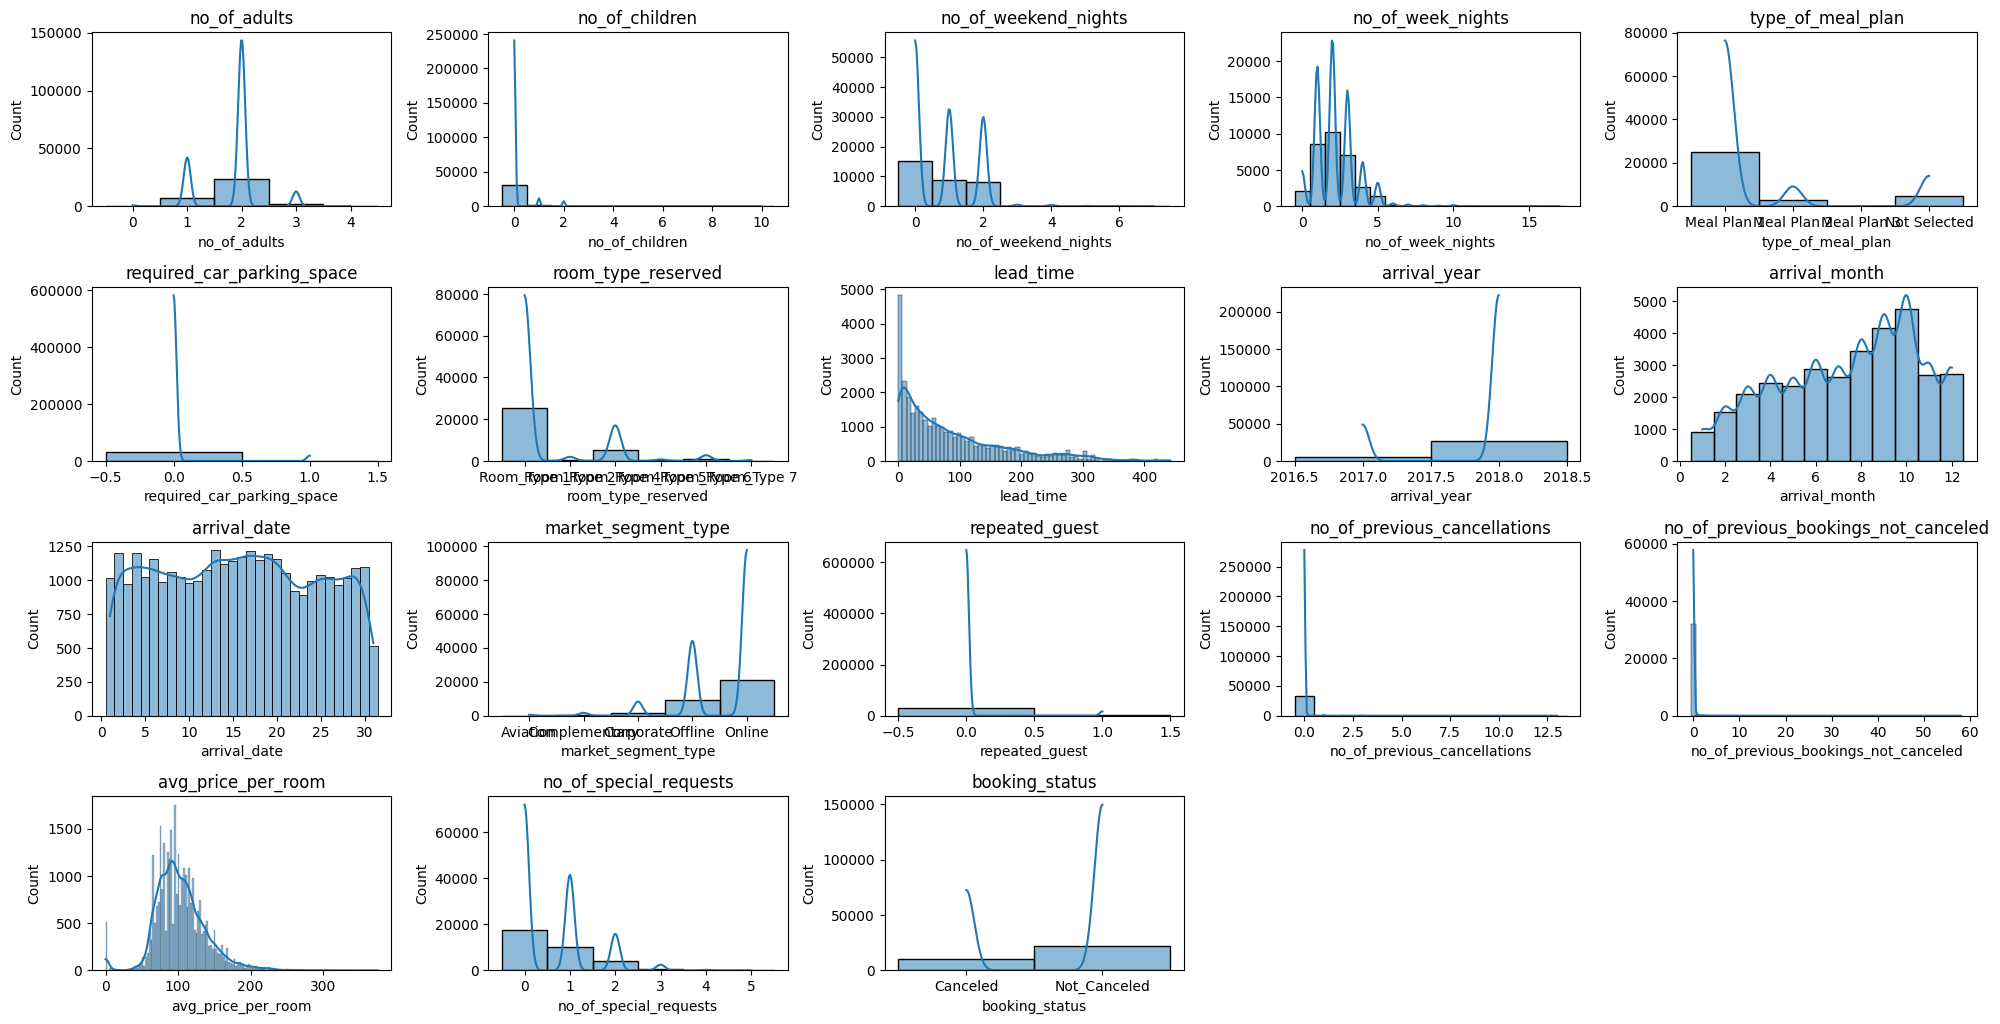

In [16]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(room_df.columns, 1):
    plt.subplot(6, 5, i)
    sns.histplot(data=room_df, x=col, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

> The above plots gives us a detailed illustration of the data. We can see presence of skewness, outliers and imbalance in the data. As per my intution, the skewness and outliers are expected in the data. Later I have handled imbalance in the data using 'RandomOverSampler'.




#### Encoding 

In [17]:
#encode only the required features

ohe_columns = ['market_segment_type', 'type_of_meal_plan']
#one hot encoding
room_df = pd.get_dummies(room_df, columns=ohe_columns,dtype='int')

In [18]:
room_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,...,booking_status,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected
0,1,0,2,1,0,Room_Type 1,116,2018,2,28,...,Canceled,0,0,0,1,0,1,0,0,0
1,2,0,0,1,0,Room_Type 1,15,2018,12,27,...,Not_Canceled,0,0,0,1,0,1,0,0,0
2,1,0,2,2,0,Room_Type 5,44,2018,5,27,...,Canceled,0,0,1,0,0,1,0,0,0
3,2,0,1,3,0,Room_Type 1,250,2018,9,26,...,Canceled,0,0,0,0,1,1,0,0,0
4,3,0,2,3,0,Room_Type 4,48,2018,7,2,...,Canceled,0,0,0,0,1,1,0,0,0


In [19]:
#label encoding for 2 columns

le = LabelEncoder()
for col in ['booking_status', 'room_type_reserved']:
    room_df[col] = le.fit_transform(room_df[col])


#### Train Test Split

In [20]:
X=room_df.drop(columns=['room_type_reserved']).values
y=room_df[['room_type_reserved']].values

In [21]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y)

In [22]:

# Initialize RandomOverSampler
random_oversampler = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = random_oversampler.fit_resample(X_train, y_train)


#### Scaling

In [23]:

# #standarization

# scaler = StandardScaler().fit(X_train_resampled)
# X_train_resampled=scaler.transform(X_train_resampled)
# # transform testing dataset
# X_test_sc = scaler.transform(X_test)

> The standardization process is observed to decrease the model's performance. Consequently, this step has been removed from the workflow.

## Question 3 : Modeling (20 pt)

Train at least ***three*** different classifier models (e.g., SVM, Logistic Regression, KNN, etc.) and optimize hyperparameters to enhance performance. Implement a validation pipeline utilizing 5-fold cross-validation. For each classifier, report classification accuracy, precision, recall, and F1 score with both macro and weighted averages.

### Random Forest 

In [24]:

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameters grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 500],
}

# Perform cross-validation and hyperparameter optimization for Random Forest classifier
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=cv, scoring='f1_macro')
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Get best Random Forest model
best_rf_model = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best estimator:", best_rf_model)

Best parameters for Random Forest: {'n_estimators': 500}
Best estimator: RandomForestClassifier(n_estimators=500)


In [25]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [26]:
#use the above parameters below
best_rf_model=RandomForestClassifier(n_estimators=200)
best_rf_model.fit(X_train_resampled, y_train_resampled)

# Validation Pipeline with Cross-Validation
cv_results_rf = cross_val_score(best_rf_model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')
print("Cross-validation Score:" ,cv_results_rf.mean())

# Predict on test data
y_pred=best_rf_model.predict(X_test)
print('Test f1 macro score',f1_score(y_test,y_pred,average='macro'))


#print the classification report
print("Classification report:", classification_report(y_test,y_pred))


Cross-validation Score: 0.9910516213044536
Test f1 macro score 0.7050910912612619
Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6375
           1       0.85      0.58      0.69       142
           2       0.81      0.73      0.77      1324
           3       0.77      0.43      0.55        63
           4       0.86      0.83      0.84       221
           5       0.60      0.33      0.43        36

    accuracy                           0.91      8161
   macro avg       0.80      0.64      0.71      8161
weighted avg       0.91      0.91      0.91      8161



#### XGBoost

In [27]:
# Applying grid search to get the best parameters
from xgboost import XGBClassifier 
xgb_classifier = XGBClassifier()

# Define hyperparameters grid for XGBoost
param_grid_xgb = {

    'n_estimators': [30,50]
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and hyperparameter optimization for XGBoost classifier
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=cv, scoring='f1_macro')
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# Get best XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_

print("Best parameters:", grid_search_xgb.best_params_)
print("Best estimator:", best_xgb_model)



Best parameters: {'n_estimators': 50}
Best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [28]:
#Now use the above best paramters in the below model

best_xgb_model.fit(X_train_resampled, y_train_resampled)

# Validation Pipeline with Cross-Validation
cv_results_xgb = cross_val_score(best_xgb_model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')
print("Cross-validation Score:", cv_results_xgb.mean())

# Calculate test balanced accuracy on test data 
y_pred = best_xgb_model.predict(X_test)
test_balanced_accuracy_xgb = f1_score(y_test, y_pred,average='macro')
print("Test f1 macro score:", test_balanced_accuracy_xgb)

# Print classification report
print("Classification report:")
print(classification_report(y_test, y_pred))



Cross-validation f1 macro Score: 0.9462746265001891
Test f1 macro score: 0.5723430016455305
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      6375
           1       0.21      0.72      0.33       142
           2       0.59      0.81      0.68      1324
           3       0.27      0.60      0.37        63
           4       0.78      0.84      0.81       221
           5       0.32      0.42      0.36        36

    accuracy                           0.81      8161
   macro avg       0.52      0.70      0.57      8161
weighted avg       0.87      0.81      0.83      8161



#### LogisticRegression

In [35]:
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression
logreg_classifier = LogisticRegression()

# Define hyperparameters grid for LogisticRegression
param_grid_logreg = {
    'C': [0.1, 1]
}

# Perform cross-validation and hyperparameter optimization for LogisticRegression
grid_search_logreg = GridSearchCV(logreg_classifier, param_grid_logreg, cv=cv, scoring='accuracy')
grid_search_logreg.fit(X_train_resampled, y_train_resampled)

# Get best LogisticRegression model
best_logreg_model = grid_search_logreg.best_estimator_
print("Best parameters for Logistic Regression:", grid_search_logreg.best_params_)
print("Best estimator:", best_logreg_model)


C:\Users\kumarip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kumarip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

Best parameters for Logistic Regression: {'C': 0.1}
Best estimator: LogisticRegression(C=0.1)


C:\Users\kumarip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.linear_model import LogisticRegression



# Train Logistic Regression classifier on the entire training set
best_logreg_model.fit(X_train_resampled, y_train_resampled)

# Validation Pipeline with Cross-Validation
cv_results_logreg = cross_val_score(best_logreg_model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')
print("Cross-validation Score:", cv_results_logreg.mean())

# Predict on test data
y_pred_logreg = best_logreg_model.predict(X_test)
print('Test balanced accuracy:', f1_score(y_test, y_pred_logreg, average='macro'))

# Print classification report
print("Classification report:", classification_report(y_test, y_pred_logreg))


C:\Users\kumarip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kumarip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

Cross-validation Score: 0.3162636855932222
Test balanced accuracy: 0.21931735642305153
Classification report:               precision    recall  f1-score   support

           0       0.88      0.27      0.41      6375
           1       0.03      0.47      0.05       142
           2       0.47      0.24      0.32      1324
           3       0.00      0.08      0.01        63
           4       0.46      0.60      0.52       221
           5       0.00      0.17      0.01        36

    accuracy                           0.27      8161
   macro avg       0.31      0.31      0.22      8161
weighted avg       0.78      0.27      0.39      8161



C:\Users\kumarip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Question 4 : Evaluation and Reporting(20 pt)

Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions

>Based on the results above, it appears that the Random Forest model outperforms both XGBoost and Logistic Regression .</br>
>The F1 macro score on the test dataset is 0.71, which suggests decent performance in generalizing to unseen data.It demonstrates strong performance across various metrics, including a high cross-validation score and respectable F1 macro score on the test dataset. Therefore, the Random Forest model is recommended for making predictions on future data.

In [37]:
# Applying random forest classifier on test data

y_pred_rf = best_rf_model.predict(X_test)
print("classification Report: ", classification_report(y_test, y_pred_rf))

classification Report:                precision    recall  f1-score   support

           0       0.93      0.97      0.95      6375
           1       0.85      0.58      0.69       142
           2       0.81      0.73      0.77      1324
           3       0.77      0.43      0.55        63
           4       0.86      0.83      0.84       221
           5       0.60      0.33      0.43        36

    accuracy                           0.91      8161
   macro avg       0.80      0.64      0.71      8161
weighted avg       0.91      0.91      0.91      8161



## Question 5 : External validation (30 pt)

A dataset named ‘test.csv’ is provided to you in which the label is hidden. You have to choose the best model(the model which has the highest score) and then use that model to predict the label on the ‘test.csv’.

After prediction, you will get an array of 0’s and 1’s. Convert that array to csv file, name it as ‘submission.csv’ and submit that ‘submission.csv’ file.

#### Load the  data

In [38]:

test_df= pd.read_csv("C:\\Users\\kumarip\\Documents\\Priya\\midterm\\Problem3\\dataset\\test.csv")
test_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,3,Meal Plan 1,0,85,2018,10,6,Offline,0,0,0,85.00,1,Not_Canceled
1,4,0,2,1,Meal Plan 1,0,21,2018,7,17,Online,0,0,0,299.33,0,Canceled
2,2,0,1,1,Meal Plan 1,0,38,2018,12,5,Complementary,0,0,0,0.00,1,Not_Canceled
3,1,0,2,4,Meal Plan 1,0,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
4,1,0,0,1,Meal Plan 1,0,25,2018,12,27,Offline,0,0,0,60.00,0,Not_Canceled


#### Preprocess the data

In [39]:
#The below code converts columns with fewer than 57 unique values into categorical data types
for col in test_df.columns:
    uniqueness = len(test_df[col].unique())
    if(uniqueness < 57):
        room_df[col] = test_df[col].astype('category')


In [40]:
#Check for null values
test_df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [41]:
#encode only the required features

ohe_columns = ['market_segment_type', 'type_of_meal_plan']
#one hot encoding
test_df = pd.get_dummies(test_df, columns=ohe_columns,dtype='int')

In [42]:
#label encoding for 1 columns

le_test = LabelEncoder()
for col in ['booking_status']:
    test_df[col] = le_test.fit_transform(test_df[col])


In [43]:
#no scaling needed

In [44]:
test_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,booking_status,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected
0,2,0,1,3,0,85,2018,10,6,0,...,1,0,0,0,1,0,1,0,0,0
1,4,0,2,1,0,21,2018,7,17,0,...,0,0,0,0,0,1,1,0,0,0
2,2,0,1,1,0,38,2018,12,5,0,...,1,0,1,0,0,0,1,0,0,0
3,1,0,2,4,0,245,2018,7,6,0,...,0,0,0,0,1,0,1,0,0,0
4,1,0,0,1,0,25,2018,12,27,0,...,1,0,0,0,1,0,1,0,0,0


#### Prediction and generate results

In [46]:

def generate_result(model):
  test_predictions = model.predict(test_df)
  submission_df = pd.DataFrame(le.inverse_transform(test_predictions), index=test_df.index)
  submission_df.to_csv('./submission.csv',index = False)

generate_result(best_rf_model)

C:\Users\kumarip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
